Simple CNN network could work for multiple dimensions of image.

In [1]:
import keras
import tensorflow 
import random
import numpy as np
import os
from keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
#from keras.layers.convolutional import  # to add pooling layers
print(f"numpy Version: {np.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print(f"tensorflow Version: {tensorflow.__version__}")


numpy Version: 1.18.5
Keras Version: 2.4.0
tensorflow Version: 2.3.0


LOAD images manual from resource  or load npy file kaggle https://www.kaggle.com/georgiosgiouvanis/poacher-detection-3classes

In [3]:
# This command just shows details of your enviroment 
# enviroment
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\ggiou\\AppData\\Roaming',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'LAPTOP-V5TOT4E1',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'tensorflow',
 'CONDA_EXE': 'C:\\Users\\ggiou\\miniconda3\\Scripts\\conda.exe',
 'CONDA_PREFIX': 'C:\\Users\\ggiou\\miniconda3\\envs\\tensorflow',
 'CONDA_PROMPT_MODIFIER': '(tensorflow) ',
 'CONDA_PYTHON_EXE': 'C:\\Users\\ggiou\\miniconda3\\python.exe',
 'CONDA_SHLVL': '1',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
 'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
 'GIT_LFS_PATH': 'C:\\Program Files\\Git LFS',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\ggiou',
 'JAVA_HOME': 'C:\\Program Files\\AdoptOpenJDK\\jdk-8.0.292.10-hotspot\\',
 'LOCALAP

In [ ]:
# The path of your files should be same with working directory

In [2]:
#Load images from PC

### images with no poachers
dataset0=[]
for root,dirs,file in os.walk("C:/Users/ggiou/Datapoach/NPA/"):#here is the path
    for filename in file:
        if ".jpg" in str(filename):
            img= mpimg.imread("C:/Users/ggiou/Datapoach/NPA/" +str(filename))
            dataset0.append(img)

### images with arrows poachers
dataset1=[]
for root,dirs,file in os.walk("C:/Users/ggiou/Datapoach/PAA/"):
    for filename in file:
        if ".jpg" in str(filename):
            img= mpimg.imread("C:/Users/ggiou/Datapoach/PAA/" +str(filename))#here is the path
            dataset1.append(img)

### images with guns poacher

dataset2=[]
for root,dirs,file in os.walk("C:/Users/ggiou/Datapoach/PGA/"):
    for filename in file:
        if ".jpg" in str(filename):
            img= mpimg.imread("C:/Users/ggiou/Datapoach/PGA/" +str(filename))
            dataset2.append(img)
            
#### Label the dataset and make a tuple with image and label


all_together = []


# LABEL NO POACHERS
for i in dataset0:
#     plt.imshow(i)
#     plt.show()
#     category1=int(input("poia katigoria einai"))
    all_together.append([i,0])
    
# LABEL POACHERS WITH ARROWS    
for i in dataset1:
# plt.imshow(i)
# plt.show()
# category1=int(input("poia katigoria einai"))
    all_together.append([i,1])

#LABEL POACHERS WITH GUNS
for i in dataset2:
# plt.imshow(i)
# plt.show()
# category1=int(input("poia katigoria einai"))
    all_together.append([i,2])
    

    
all_together = np.array(all_together)

all together.npy file could found https://www.kaggle.com/georgiosgiouvanis/poacher-detection-3classes

In [3]:

# save the dataset
#np.save("all_together.npy",all_together)

# load the dataset
all_together= np.load("./all_together.npy",allow_pickle= True)

images = all_together.T[0]
ids = all_together.T[1]
    
#Split the dataset train and test 
X_train, X_test, y_train, y_test = train_test_split(images, ids, test_size=0.30, random_state=42)

# append again the matrices to have shape (number of images,224,224,3) and NO ( numbOfImage,)
# Because we transpose the matrix before
X_train_reshape = []
for i in X_train:
    X_train_reshape.append(i)
    

    
X_train_reshape=np.array(X_train_reshape)

X_test_reshape = []
for i in X_test:
    X_test_reshape.append(i)
    

    
X_test_reshape=np.array(X_test_reshape)

## Normalize
X_train = X_train_reshape / 255 # normalize training data
X_test = X_test_reshape / 255 # normalize test data

# Keras model with softmax need categorical 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories
print(num_classes)





3


Choose model

In [5]:
# Manual build  model
def Poach_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(224, 224, 3),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same',strides=(2, 2)))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.20))
    
    model.add(Flatten())
    model.add(Dropout(0.50))
    model.add(Dense(64, activation='linear'))
    model.add(LeakyReLU(alpha=0.1)) 
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

model=Poach_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [ ]:
# ### Resnet50 model 
# model= tensorflow.keras.applications.ResNet50(
#     include_top=None,
#     weights=None,
#     input_tensor= (224, 224, 3),
#     input_shape=None,
#     pooling="avg",
#     classes=3,
#     classifier_activation="softmax"
# )

In [6]:
###Train the model 

#Keep history the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/20
104/104 - 326s - loss: 0.9815 - accuracy: 0.5941 - val_loss: 0.7976 - val_accuracy: 0.6514
Epoch 2/20
104/104 - 319s - loss: 0.7389 - accuracy: 0.6671 - val_loss: 0.7269 - val_accuracy: 0.6740
Epoch 3/20
104/104 - 316s - loss: 0.6454 - accuracy: 0.7119 - val_loss: 0.6297 - val_accuracy: 0.7304
Epoch 4/20
104/104 - 325s - loss: 0.5332 - accuracy: 0.7648 - val_loss: 0.6659 - val_accuracy: 0.7078
Epoch 5/20
104/104 - 328s - loss: 0.4489 - accuracy: 0.7954 - val_loss: 0.5147 - val_accuracy: 0.7742
Epoch 6/20
104/104 - 333s - loss: 0.4214 - accuracy: 0.8163 - val_loss: 0.4520 - val_accuracy: 0.8031
Epoch 7/20
104/104 - 340s - loss: 0.3432 - accuracy: 0.8514 - val_loss: 0.4154 - val_accuracy: 0.8342
Epoch 8/20
104/104 - 324s - loss: 0.2967 - accuracy: 0.8738 - val_loss: 0.3954 - val_accuracy: 0.8419
Epoch 9/20
104/104 - 323s - loss: 0.2265 - accuracy: 0.9065 - val_loss: 0.3920 - val_accuracy: 0.8483
Epoch 10/20
104/104 - 328s - loss: 0.2434 - accuracy: 0.9025 - val_loss: 0.2911 - 

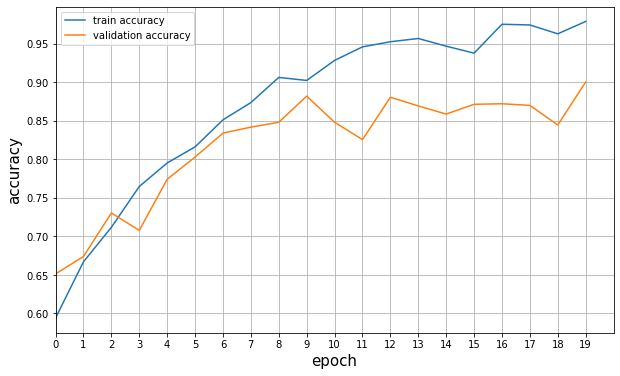

In [7]:
#Plot the model

Number_epochs = 20
model_name = 'Poach_model'
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlim(0,Number_epochs)
plt.xticks(np.arange(Number_epochs))
plt.grid(True)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [11]:
# save weights 
model.save_weights('weightsP90%.h5')

## save model architecture
model.save("modelP90%.h5")